In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


In [3]:
data = pd.read_csv(r"C:\Users\fargh\Downloads\Room_price_data.csv")
data

,Price,Hostel No.,Occupancy,Room Size,Floor
0,2540.0,3,1,686,8
1,2900.0,3,2,966,5
2,NaN,3,1,788,8
3,2362.0,3,2,924,2
4,NaN,3,2,1098,5
...,...,...,...,...,...
6584,1062.0,1,3,1299,3
6585,2320.0,3,3,1299,2
6586,2350.0,3,3,1127,3
6587,600.0,1,2,963,3


In [4]:
data.info()


<class 'pandas.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       5048 non-null   float64
 1   Hostel No.  6589 non-null   int64  
 2   Occupancy   6589 non-null   int64  
 3   Room Size   6589 non-null   int64  
 4   Floor       6589 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 257.5 KB


In [5]:
data.describe()

,Price,Hostel No.,Occupancy,Room Size,Floor
count,5048.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,1904.298943,2.076946,2.025952,978.522234,4.228107
std,1059.319562,0.791767,0.801161,235.277819,2.262527
min,370.000000,1.000000,1.000000,500.000000,1.000000
25%,1202.000000,1.000000,1.000000,779.000000,2.000000
50%,1620.000000,2.000000,2.000000,991.000000,4.000000
75%,2352.500000,3.000000,3.000000,1139.000000,6.000000
max,12020.000000,3.000000,4.000000,1748.000000,8.000000


In [6]:
data.duplicated().sum()

np.int64(174)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.size

32075

In [10]:
data.nunique()

Price         1320
Hostel No.       3
Occupancy        4
Room Size     1012
Floor            8
dtype: int64

In [11]:
data.isnull().sum()

Price         1410
Hostel No.       0
Occupancy        0
Room Size        0
Floor            0
dtype: int64

In [12]:
data['Price'] = data['Price'].fillna(data['Price'].median())

In [13]:
data.isnull().sum()

Price         0
Hostel No.    0
Occupancy     0
Room Size     0
Floor         0
dtype: int64

<Axes: >

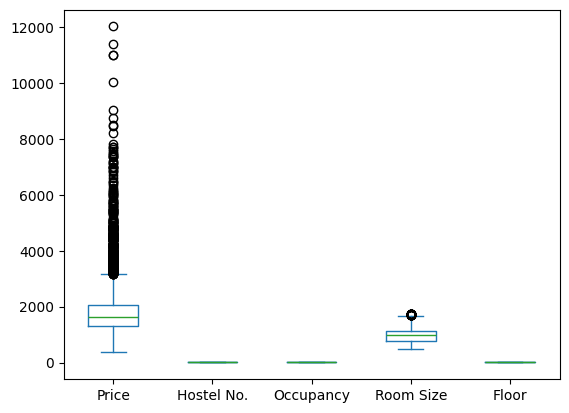

In [14]:
data.plot(kind="box")

In [15]:
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower) & (data[col] <= upper)]

<Axes: >

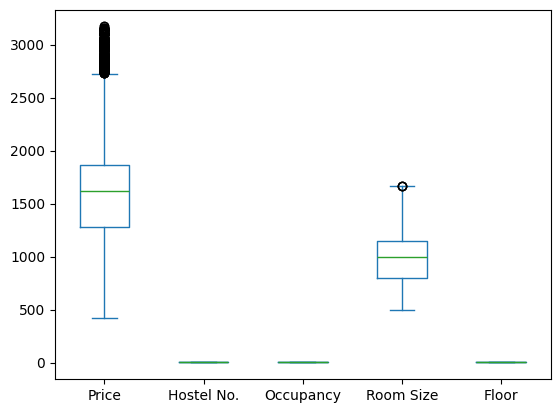

In [16]:
data.plot(kind="box")

In [17]:
median_price = data['Price'].median()

data.loc[data['Price'] < lower, 'Price'] = median_price
data.loc[data['Price'] > upper, 'Price'] = median_price

In [18]:
median_Room_Size = data['Room Size'].median()

data.loc[data['Room Size'] < lower, 'Room Size'] = median_Room_Size
data.loc[data['Room Size'] > upper, 'Room Size'] = median_Room_Size

<Axes: >

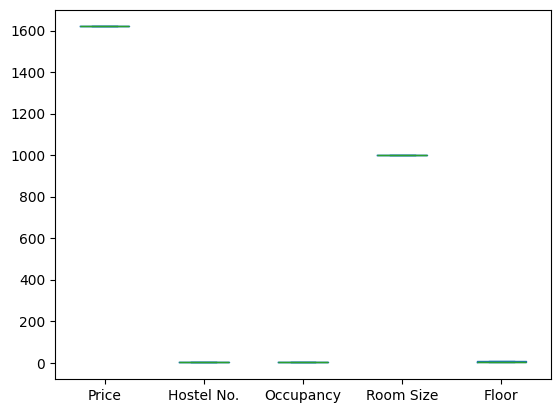

In [19]:
data.plot(kind="box")

In [20]:
data.info()

<class 'pandas.DataFrame'>
Index: 5883 entries, 0 to 6537
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       5883 non-null   float64
 1   Hostel No.  5883 non-null   int64  
 2   Occupancy   5883 non-null   int64  
 3   Room Size   5883 non-null   int64  
 4   Floor       5883 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 275.8 KB


In [21]:
X = data[["Hostel No.", "Occupancy" , "Room Size" , "Floor"]]
y = data.Price

In [22]:
X

,Hostel No.,Occupancy,Room Size,Floor
0,3,1,1000,8
1,3,2,1000,5
2,3,1,1000,8
3,3,2,1000,2
4,3,2,1000,5
...,...,...,...,...
6533,2,1,1000,3
6534,2,1,1000,3
6535,3,2,1000,3
6536,2,2,1000,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train

,Hostel No.,Occupancy,Room Size,Floor
1953,2,2,1000,4
5910,1,1,1000,5
1674,2,3,1000,3
424,1,1,1000,1
3406,3,1,1000,8
...,...,...,...,...
5452,3,2,1000,3
3602,2,3,1000,1
1816,2,2,1000,5
2865,3,2,1000,1


In [24]:
LR = LinearRegression()
LR.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
y_pred = LR.predict(X_test)

In [26]:
y_pred

array([1620., 1620., 1620., ..., 1620., 1620., 1620.], shape=(1471,))

In [27]:
def plot_results(X,y):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, LR.predict(X), color = 'blue')
    plt.title('Price of Hostels')
    plt.xlabel('Features')
    plt.ylabel('Price')
    plt.show()


In [28]:
score = r2_score(y_test, y_pred)

print("R^2 score:", "{:.0%}".format(score))

R^2 score: 100%
